## Importing Datasets

1. The first dataset comes from Kaggle. https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset 

2. The second dataset comes from Harvard Database. https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/EWHO0O 

In [ ]:
%pip install numpy pandas matplotlib seaborn openpyxl

   ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.4 MB 6.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.6/12.4 MB 6.3 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.4 MB 5.8 MB/s eta 0:00:02
   ---------------- ----------------------- 5.0/12.4 MB 5.9 MB/s eta 0:00:02
   -------------------- ------------------- 6.3/12.4 MB 6.0 MB/s eta 0:00:02
   ------------------------- -------------- 7.9/12.4 MB 6.2 MB/s eta 0:00:01
   -------------------------------- ------- 10.0/12.4 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 12.4/12.4 MB 7.6 MB/s  0:00:01
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.9 MB 12.7 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.9 MB 10.1 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.9 MB 10.5 MB/s eta 0:00:01
   ------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\Zi Hao\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\site-packages\\fontTools\\ttLib\\tables\\S_V_G_.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pandas-3.0.0-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
Using cached pandas-3.0.0-cp314-cp314-win_amd64.whl (9.9 MB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl (75 kB)

   ----- ---------------------------------- 1/7 [fonttools]
   ----- ---------------------------------- 1/7 [fonttools]
   ----- ---------------------------------- 1/7 [fonttools]
   -----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl

In [63]:
df_1 = pd.read_csv('data/Mental Health Dataset.csv')

Let's explore the Mental Health Dataset first.

In [64]:
for col in df_1.columns:
    print(f"Column: {col}")
    print(df_1[col].value_counts(dropna=False))  # include NaNs
    print("-" * 30)

# To narrow the scope, let's just focus on Students

df_1 = df_1[df_1['Occupation'] == 'Student']

df_1 = df_1.drop(columns=['Timestamp', 'self_employed', 'Country'], inplace=False)

# yes_no_cols = ["family_history", "treatment", "Growing_Stress", "Changes_Habits", "Mental_Health_History", "Coping_Struggles", "Work_Interest", "Social_Weakness"]
# df_1[yes_no_cols] = df_1[yes_no_cols].apply(lambda col: col.map({"Yes": 1, "No": 0}))


Column: Timestamp
Timestamp
8/27/2014 11:43    2384
8/27/2014 12:31    2340
8/27/2014 12:53    1648
8/27/2014 12:39    1604
8/27/2014 16:21    1604
                   ... 
7/27/2015 23:25     390
8/17/2015 9:38      390
8/25/2015 19:59     390
9/26/2015 1:07      390
2/1/2016 23:04      390
Name: count, Length: 580, dtype: int64
------------------------------
Column: Gender
Gender
Male      239850
Female     52514
Name: count, dtype: int64
------------------------------
Column: Country
Country
United States             171308
United Kingdom             51404
Canada                     18726
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
South Africa                1994
New Zealand                 1994
Switzerland                 1560
Israel                      1560
Italy 

In [80]:
df_1['Mental_Health_History'].value_counts()

Mental_Health_History
No       23058
Maybe    20709
Yes      18027
Name: count, dtype: int64

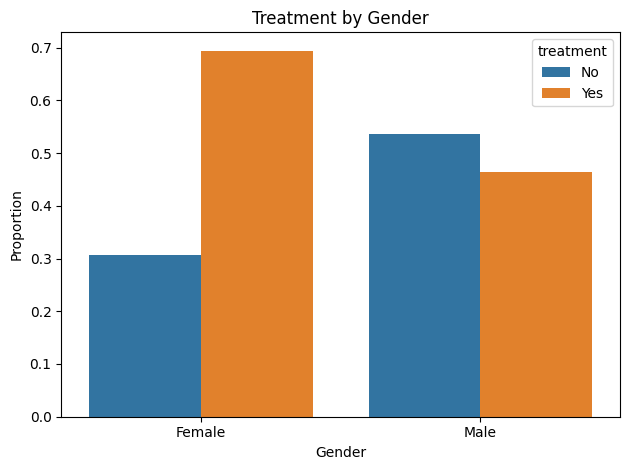

In [77]:
# Proportion of each Treatment category by Gender
grouped = df_1[df_1["Mental_Health_History"] == "Yes"]
grouped = grouped.groupby(["Gender", "treatment"]).size().reset_index(name="count")
grouped["proportion"] = grouped.groupby("Gender")["count"].transform(lambda x: x / x.sum())

sns.barplot(data=grouped, x="Gender", y="proportion", hue="treatment")
plt.ylabel("Proportion")
plt.title("Treatment by Gender")
plt.tight_layout()
plt.show()

Let's split days indoor to 2 groups: Less than or equal 30 days and more than 30 days.

In [65]:
# Function to reclassify
def reclassify_days(x):
    if x in ["Go out Every day", "1-14 days", "15-30 days"]:
        return "<=30 days"
    elif x in ["31-60 days", "More than 2 months"]:
        return ">30 days"
    else:
        return "Unknown"

# Apply function
df_1['Days_Indoor_Reclass'] = df_1['Days_Indoors'].apply(reclassify_days)
df_1.drop(columns=['Days_Indoors'], inplace=True)

df_1.head()

,Gender,Occupation,family_history,treatment,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Days_Indoor_Reclass
121,Female,Student,No,Yes,No,Yes,No,Medium,Yes,Maybe,No,No,Not sure,<=30 days
122,Female,Student,Yes,Yes,No,Yes,No,Medium,Yes,Maybe,No,No,No,<=30 days
123,Female,Student,Yes,Yes,No,Yes,No,Medium,Yes,Maybe,No,No,Yes,<=30 days
124,Female,Student,Yes,Yes,No,Yes,No,Medium,Yes,Maybe,No,Maybe,Yes,<=30 days
125,Female,Student,Yes,Yes,No,Yes,No,Medium,Yes,Maybe,No,No,Yes,<=30 days


In [72]:
grouped = (
    df_1.groupby(["Gender", "Days_Indoor_Reclass", "Mental_Health_History", "Coping_Struggles"])
      .size()
      .reset_index(name="count")
)

grouped["proportion"] = grouped.groupby(["Gender", "Days_Indoor_Reclass", "Coping_Struggles"])["count"].transform(lambda x: x / x.sum())

grouped 

,Gender,Days_Indoor_Reclass,Mental_Health_History,Coping_Struggles,count,proportion
0,Female,<=30 days,Maybe,No,1573,0.393939
1,Female,<=30 days,Maybe,Yes,1331,0.366667
2,Female,<=30 days,No,No,1089,0.272727
3,Female,<=30 days,No,Yes,968,0.266667
4,Female,<=30 days,Yes,No,1331,0.333333
5,Female,<=30 days,Yes,Yes,1331,0.366667
6,Female,>30 days,Maybe,No,726,0.333333
7,Female,>30 days,Maybe,Yes,1089,0.500000
8,Female,>30 days,No,No,847,0.388889
9,Female,>30 days,No,Yes,1089,0.500000


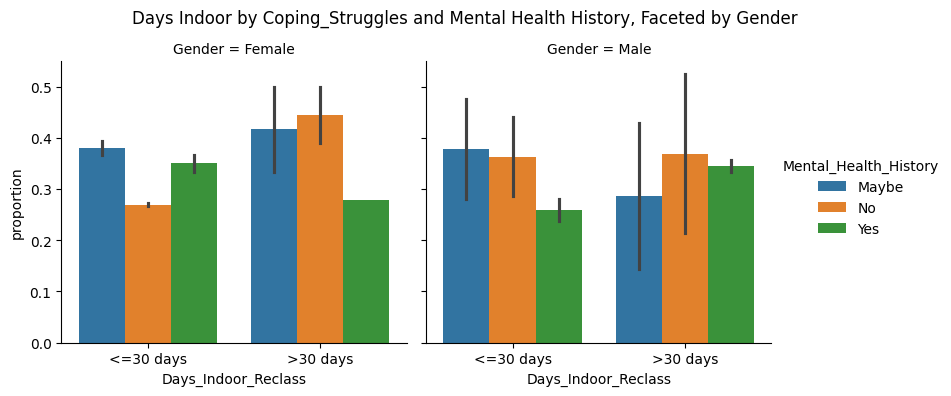

In [71]:
# Create proportions for grouped bar plotting
grouped = (
    df_1.groupby(["Gender", "Days_Indoor_Reclass", "Mental_Health_History", "Coping_Struggles"])
      .size()
      .reset_index(name="count")
)
grouped["proportion"] = grouped.groupby(["Gender", "Days_Indoor_Reclass", "Coping_Struggles"])["count"].transform(lambda x: x / x.sum())
sns.catplot(
    data=grouped,
    x="Days_Indoor_Reclass",
    y="proportion",
    hue="Mental_Health_History",
    col="Gender",
    kind="bar",
    height=4,
    aspect=1
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Days Indoor by Coping_Struggles and Mental Health History, Faceted by Gender")
plt.show()

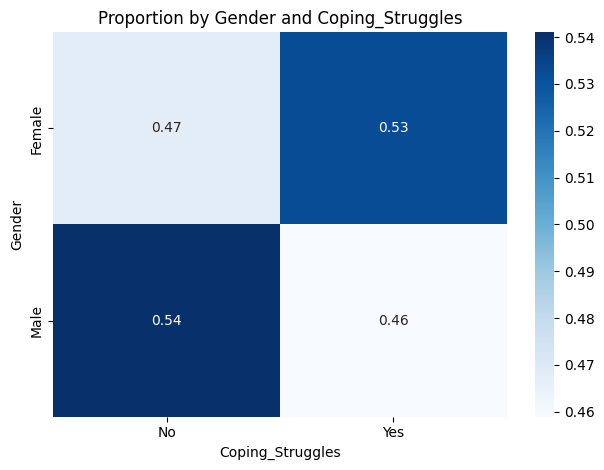

In [38]:
# Example: Coping_Struggles vs Gender
heatmap_data = (
    df_1.groupby(["Gender", "Coping_Struggles"]).size()
    .unstack()
    .apply(lambda x: x / x.sum(), axis=1)  # normalize per row
)

sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues")
plt.title("Proportion by Gender and Coping_Struggles")
plt.tight_layout()
plt.show()


In [15]:
df_2 = pd.read_excel('data/ALL_aun_pacs210914.xlsx')

df_2.head()

,pin,lang,gpaq1,gpaq2,P1,P2,P3a,P3bb,P3b,P4,...,ride_bicycle,by_bicycle,motorbike_three_wheel,sit_car,bus_van_pickup_taxi_schbus,train_metro,ferry,housing,sport_club,opinion_pa
0,1,EN-Bru,3,5,2,0,0,0,0,2,...,0,0,0,1,0,0,0,1,1,NaN
1,2,EN-Bru,2,1,2,0,0,0,0,2,...,0,0,0,0,0,0,0,2,2,NaN
2,3,EN-Bru,0,2,2,0,0,0,0,1,...,0,0,0,1,0,0,0,1,2,NaN
3,4,EN-Bru,7,3,2,0,0,0,0,1,...,0,0,0,1,0,0,0,1,2,NaN
4,5,EN-Bru,4,0,2,0,0,0,0,1,...,0,0,0,1,0,0,0,1,2,NaN
